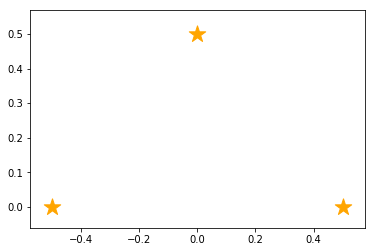

In [7]:
%matplotlib inline
import numpy as np
from copy import copy
import math, random
import matplotlib.pyplot as plt                   #   for plotting data
from matplotlib.patches import Ellipse      #  for drawing

actual_landmarks = [np.array([-0.5,0.0]),np.array([0.5,0.0]),np.array([0.0,0.5])]

def draw_landmarks(landmarks):
    xs = [ e[0] for e in actual_landmarks ]
    ys = [ e[1] for e in actual_landmarks ]
    
    plt.scatter(xs,ys,s=300,marker="*",label="landmarks",color="orange")
    
draw_landmarks(actual_landmarks)

In [9]:
actual_x = np.array([0.2,0.3,math.pi*200.0/180])   #ロボットの実際の姿勢

def draw_robot(pose):
    plt.quiver([pose[0]],[pose[1]],[math.cos(pose[2])],[math.sin(pose[2])],color="red",label="actual robot motion")

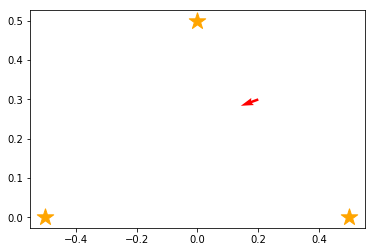

In [10]:
draw_robot(actual_x)
draw_landmarks(actual_landmarks)

In [18]:
def relative_landmark_pos(pose,landmark):
    x,y,theta = pose
    lx,ly = landmark
    
    distance = math.sqrt((lx - x)**2 + (ly - y)**2)
    direction = math.atan2(ly - y, lx - x) - theta
    
    return distance, direction, lx, ly

In [19]:
measurements = [ relative_landmark_pos(actual_x, ln) for ln in actual_landmarks ]

In [20]:
print(measurements)

[(0.7615773105863908, -6.2273593712933693, -0.5, 0.0), (0.4242640687119285, -4.2760566673861078, 0.5, 0.0), (0.28284271247461906, -1.1344640137963142, 0.0, 0.5)]


In [21]:
def draw_observation(pose, measurement):
    x,y,theta = pose
    mdistance, mdirection,tmp_x,tmp_y = measurement
    
    lx = x + mdistance * math.cos(theta + mdirection)
    ly = y + mdistance * math.sin(theta + mdirection)
    
    plt.plot([pose[0],  lx],[pose[1],  ly],color="pink")
    
def draw_observations(pose, measurements):
    for m in measurements:
        draw_observation(pose,m)

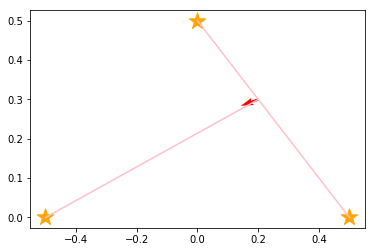

In [22]:
draw_robot(actual_x)
draw_landmarks(actual_landmarks)
draw_observations(actual_x, measurements)